In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70,resize=0.4)

In [3]:
print(lfw_people.data.shape)
print(lfw_people.images.shape)

(1288, 1850)
(1288, 50, 37)


In [4]:
X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

n_samples, n_features = X.shape
_, h, w = lfw_people.images.shape
n_classes = len(names)

print("n_samples:{}".format(n_samples))
print("n_features:{}".format(n_features))
print("n_classes:{}".format(n_classes))

n_samples:1288
n_features:1850
n_classes:7


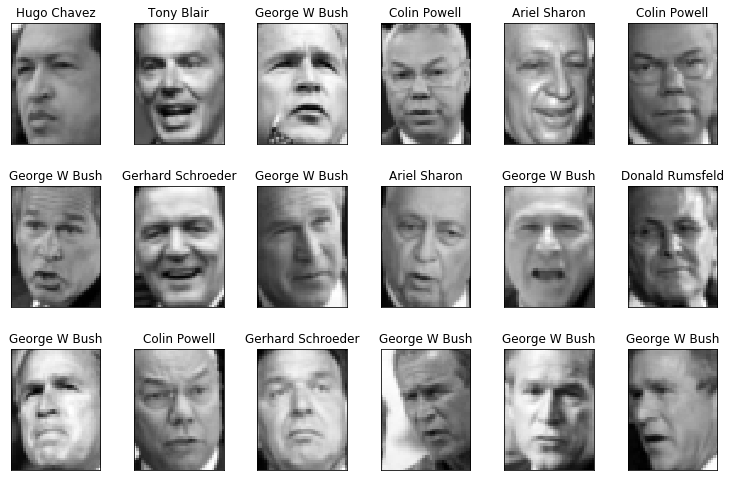

In [8]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    plt.figure(figsize=(1.7*n_col, 2.3*n_row))
    plt.subplots_adjust(bottom=0,left=0.01,right=0.99,top=0.90,hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape((h,w)), cmap=plt.cm.gray)
        plt.title(titles[i],size=12)
        plt.xticks(())
        plt.yticks(())
        
plot_gallery(X,names[y], h, w)

<Container object of 7 artists>

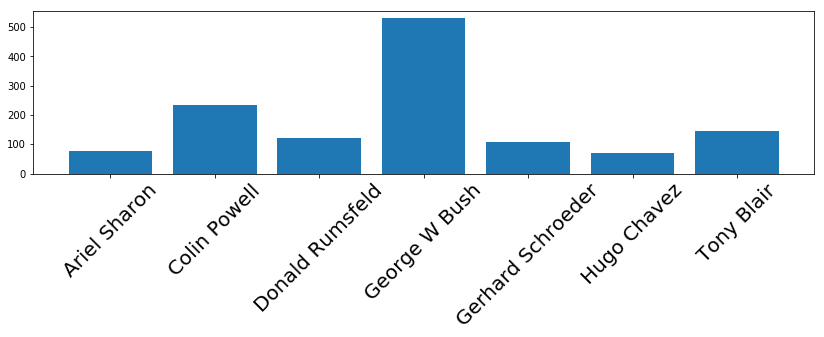

In [17]:
plt.figure(figsize=(14,3))

y_unique = np.unique(y) # np.unique(): return different values in the array
counts = [(y==i).sum() for i in y_unique]

plt.xticks(y_unique, names[y_unique])
locs, labels = plt.xticks() # ticks return 2 objects, locs(刻标)and labels(刻度标签)
plt.setp(labels, rotation=45, size=20) # plt.setp = set property
plt.bar(y_unique, counts)

In [18]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

C:\Users\sunqu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
from sklearn.decomposition import RandomizedPCA
# Principal component analysis (PCA) using randomized SVD(singular value decomposition)

n_components = 150
print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))

pca = RandomizedPCA(n_components = n_components, whiten=True)

%time pca.fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h* w))

Extracting the top 150 eigenfaces from 901 faces
Wall time: 57.8 ms


C:\Users\sunqu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


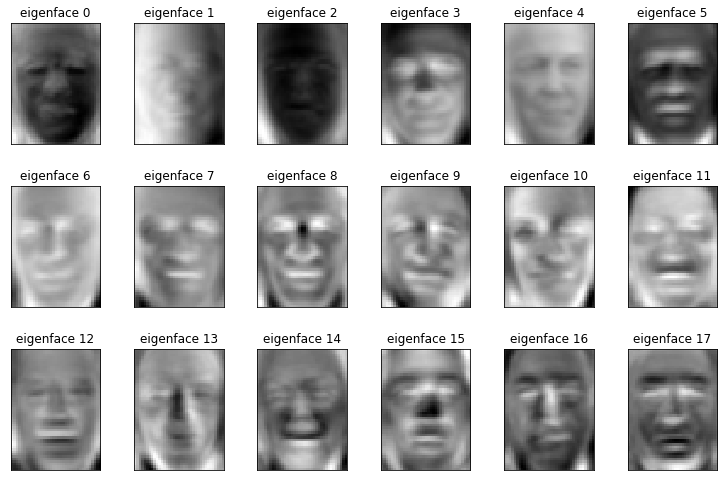

In [28]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

In [29]:
X_train_pca = pca.transform(X_train)

In [56]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm
# C:Penalty parameter C of the error term; gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. If gamma is ‘auto’ then 1/n_features will be used instead.

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import cross_val_score

cv = StratifiedShuffleSplit(y_train, test_size=0.20, n_iter=3)
cv

StratifiedShuffleSplit(labels=[6 5 0 1 3 3 3 6 5 0 3 6 3 1 3 1 1 4 4 4 3 6 1 3 1 2 3 6 3 3 6 5 3 2 0 3 3
 6 3 3 3 1 4 4 3 2 4 3 3 3 4 3 2 3 4 6 5 6 3 1 3 3 3 3 6 1 4 4 3 1 1 0 0 3
 5 4 3 3 3 5 6 3 3 6 5 6 1 5 3 6 2 5 3 6 3 6 2 1 3 2 1 3 5 0 1 4 3 0 6 3 4
 0 1 4 0 6 4 1 3 5 5 3 3 1 5 3 3 1 3 2 3 2 3 3 0 3 3 3 0 1 3 4 5 0 3 3 6 1
 4 1 3 3 1 0 2 0 1 1 2 3 3 6 5 6 2 3 5 3 6 1 4 1 1 6 3 3 3 3 1 3 3 1 3 3 3
 3 2 2 6 1 3 2 3 4 2 3 5 6 3 3 3 6 2 4 2 3 4 3 2 3 3 3 3 0 3 5 3 1 3 3 3 3
 3 3 3 3 3 1 3 3 3 5 1 4 4 3 1 2 1 2 5 3 4 2 4 3 2 3 6 0 3 3 3 1 3 3 1 3 4
 3 0 2 3 6 3 2 3 3 6 3 2 6 3 3 5 3 3 1 1 6 3 2 1 3 2 2 2 3 3 1 4 2 6 4 1 6
 3 0 3 3 3 2 1 1 3 5 0 1 0 2 1 3 3 3 1 4 4 5 3 2 6 2 1 2 6 3 3 3 1 3 3 3 4
 1 1 1 6 4 3 6 5 6 1 3 3 3 3 1 3 5 1 6 3 3 3 3 1 5 2 1 1 4 1 1 3 0 6 4 4 1
 0 6 2 3 2 3 1 3 4 3 1 3 3 1 3 3 3 6 4 2 6 3 6 1 3 6 1 4 6 4 3 3 0 1 6 0 3
 2 3 3 6 3 3 1 1 6 2 3 6 3 2 1 1 4 3 3 3 3 2 5 3 0 3 3 1 3 2 3 0 3 3 1 1 3
 1 3 4 3 1 3 2 3 3 0 1 3 1 1 5 1 6 3 0 1 3 5 6 4 2 2 6 3 3 1 6 3 3 6 3

In [69]:
from sklearn.grid_search import GridSearchCV

param_grid = {
    'C':[1e3, 5e3, 1e4, 5e4, 1e5],
    'gamma':[0.0001, 0.0005, 0.001, 0.005, 0.001, 0.1]
}
clf = GridSearchCV(svm, param_grid, scoring='f1', cv=cv, n_jobs=2)
clf = svm.fit(X_train_pca, y_train)

In [74]:
X_test_pca = pca.transform(X_test)
y_pred = clf.predict(X_test_pca)
y_pred

array([1, 3, 4, 3, 6, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 5,
       3, 0, 3, 3, 3, 3, 1, 1, 4, 3, 3, 3, 1, 3, 1, 2, 6, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 2, 3, 1, 2, 1, 4, 1, 3, 3, 3, 3, 3,
       3, 0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 0, 1, 1, 3, 3, 2, 3, 3, 3,
       4, 3, 3, 1, 3, 0, 2, 1, 3, 3, 3, 4, 3, 3, 3, 1, 3, 3, 3, 2, 5, 3,
       3, 3, 1, 3, 3, 6, 0, 1, 1, 1, 3, 3, 3, 3, 4, 3, 3, 2, 3, 3, 1, 1,
       6, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 3, 4, 3, 2, 3, 3, 1, 3, 3, 0, 4,
       3, 1, 3, 6, 1, 3, 3, 3, 6, 3, 6, 3, 3, 1, 3, 1, 3, 3, 1, 4, 3, 3,
       0, 3, 1, 1, 3, 6, 1, 1, 3, 1, 1, 6, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       6, 1, 1, 1, 3, 3, 5, 6, 3, 3, 5, 1, 3, 3, 1, 3, 2, 3, 5, 3, 3, 1,
       3, 3, 1, 3, 3, 3, 1, 6, 0, 3, 1, 3, 4, 3, 3, 1, 3, 4, 2, 1, 3, 1,
       4, 3, 3, 3, 3, 1, 1, 1, 3, 5, 3, 1, 6, 3, 5, 3, 3, 1, 1, 3, 2, 1,
       6, 2, 3, 3, 3, 3, 2, 1, 3, 3, 5, 3, 3, 1, 1, 1, 6, 6, 2, 1, 3, 1,
       3, 1, 3, 6, 3, 2, 1, 2, 1, 3, 3, 3, 1, 1, 1,

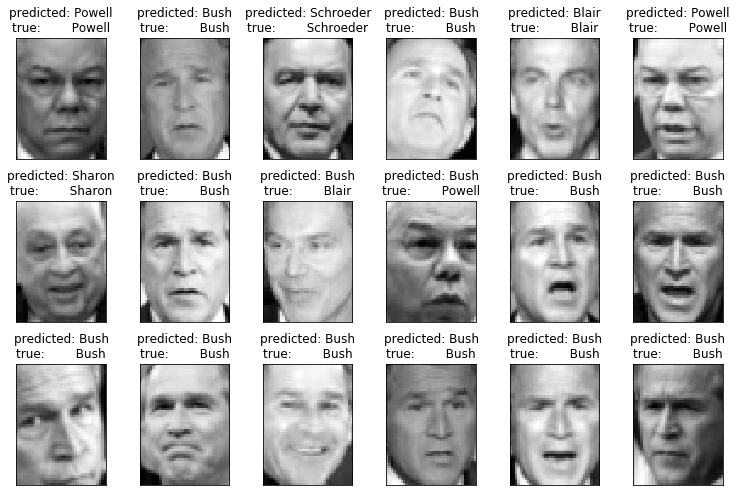

In [73]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:        %s'% (pred_name, true_name)
prediction_titles = [title(y_pred, y_test, names, i) for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

In [75]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.43      0.60        28
     Colin Powell       0.82      0.80      0.81        82
  Donald Rumsfeld       0.95      0.56      0.71        32
    George W Bush       0.63      0.97      0.77       147
Gerhard Schroeder       1.00      0.47      0.64        34
      Hugo Chavez       1.00      0.44      0.61        25
       Tony Blair       1.00      0.59      0.74        39

      avg / total       0.82      0.75      0.74       387



In [76]:
from sklearn.metrics import confusion_matrix 

# the number of false classification

cm = confusion_matrix(y_test, y_pred, labels=range(n_classes))
print(cm)

[[ 12   3   0  13   0   0   0]
 [  0  66   1  15   0   0   0]
 [  0   2  18  12   0   0   0]
 [  0   4   0 143   0   0   0]
 [  0   1   0  17  16   0   0]
 [  0   2   0  12   0  11   0]
 [  0   2   0  14   0   0  23]]


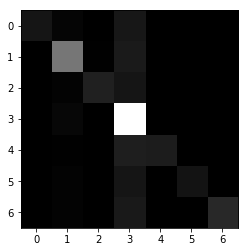

In [87]:
plt.imshow(cm, cmap=plt.cm.gray) # 0->the darkest